<a href="https://colab.research.google.com/github/Shri-Aiswarya/NLP/blob/main/NLP_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1. Sentiment Analysis
This exercise will allow you to use PyTorch. Refer to the DATA 690 Resources.
1. Import the required libraries.
2. Load the dataset containing a set of 1,000 product reviews from Amazon, which are
paired with a label of 0 (for negative reviews) or 1 (for positive reviews). Get the data at
https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences.
3. Separate the data into two variables: one containing the reviews and the other containing
the labels. Remove the punctuation from the reviews.
4. Create a variable containing the vocabulary of the entire set of reviews.
5. Additionally, create a dictionary that maps each word to an integer, where the words will
be the keys and the integers will be the values.
6. Encode the review data by replacing each word in a review for its paired integer.
7. Create a class containing the architecture of the network.
8. Make sure that you include an embedding layer. Initialize the model using 64 embedding
dimensions and 128 neurons for 3 LSTM layers.
9. Define the loss function, an optimization algorithm, and the number of epochs to train for.
For example, you can use binary cross-entropy loss as the loss function, the Adam
optimizer, and train for 10 epochs.
10. Create a for loop that goes through the different epochs and through every single
review individually. For each review, perform a prediction, calculate the loss function, and
update the parameters of the network. Additionally, calculate the accuracy of the network
over that training data.
11. Plot the progress of the loss function and accuracy over time.

Epoch 1/10, Loss: 0.6945, Accuracy: 0.4910
Epoch 2/10, Loss: 0.6942, Accuracy: 0.4770
Epoch 3/10, Loss: 0.6938, Accuracy: 0.4740
Epoch 4/10, Loss: 0.6935, Accuracy: 0.4730
Epoch 5/10, Loss: 0.6936, Accuracy: 0.4730
Epoch 6/10, Loss: 0.6935, Accuracy: 0.4690
Epoch 7/10, Loss: 0.6937, Accuracy: 0.4720
Epoch 8/10, Loss: 0.6939, Accuracy: 0.4740
Epoch 9/10, Loss: 0.6936, Accuracy: 0.4660
Epoch 10/10, Loss: 0.6935, Accuracy: 0.4700


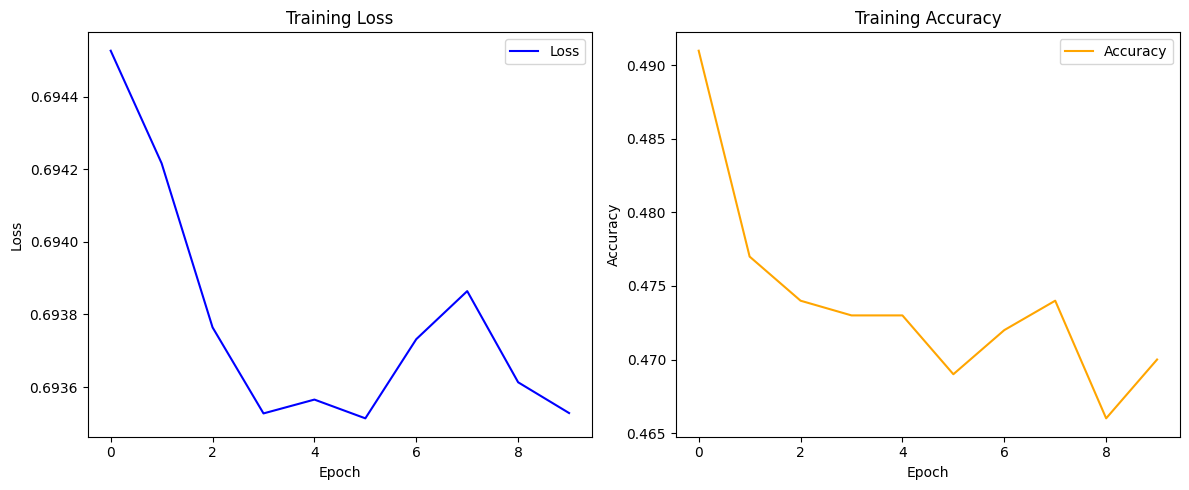

In [38]:
#Importing the required libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import string

#Loading the dataset
url = "amazon_cells_labelled.txt"
data = pd.read_csv(url, header=None, names=["review", "label"], delimiter="\t")

#Separating the data into reviews and labels
reviews = data['review'].values
labels = data['label'].values

#Removing punctuation and lowering the text
reviews = [review.translate(str.maketrans('', '', string.punctuation)).lower() for review in reviews]

#Creating a vocabulary
vocabulary = set()
for review in reviews:
    words = review.split()
    vocabulary.update(words)
vocabulary = sorted(vocabulary)

#Creating a word-to-integer mapping
word_to_index = {word: idx for idx, word in enumerate(vocabulary, start=1)}

#Encoding the review data
encoded_reviews = []
for review in reviews:
    encoded_review = [word_to_index[word] for word in review.split() if word in word_to_index]
    encoded_reviews.append(encoded_review)

#Padding the sequences to the same length
max_length = max(len(review) for review in encoded_reviews)
padded_reviews = np.array([review + [0] * (max_length - len(review)) for review in encoded_reviews])

#Converting to PyTorch tensors
X = torch.tensor(padded_reviews, dtype=torch.long)
y = torch.tensor(labels, dtype=torch.float32)  # Labels tensor

#Creating a LSTM model class
class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim=64, hidden_dim=128):
        super(SentimentLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=3, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = self.embedding(x)
        x, (hidden, _) = self.lstm(x)
        x = self.fc(hidden[-1])
        return torch.sigmoid(x)

#Defining loss function, optimizer, and number of epochs
num_epochs = 10
learning_rate = 0.001

#Initializing the model
model = SentimentLSTM(vocab_size=len(vocabulary) + 1)

#Defining the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#Training Loop
losses = []
accuracies = []

#Moveing model to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    epoch_loss = 0
    correct_predictions = 0

    #Looping through each review individually
    for i in range(len(X)):
        review = X[i].unsqueeze(0).to(device)
        label = y[i].unsqueeze(0).unsqueeze(0).to(device)
        optimizer.zero_grad()

        #Forward pass
        output = model(review)

        #Calculating loss
        loss = criterion(output, label)

        #Backward pass and optimization
        loss.backward()
        optimizer.step()

        #Accumulating loss
        epoch_loss += loss.item()

        #Calculating accuracy
        predicted = (output > 0.5).float()
        correct_predictions += (predicted == label).sum().item()

    #Calculating epoch metrics
    avg_loss = epoch_loss / len(X)
    accuracy = correct_predictions / len(X)

    losses.append(avg_loss)
    accuracies.append(accuracy)

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')

#Plotting Loss and Accuracy
plt.figure(figsize=(12, 5))

#Plotting loss
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

#Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Exercise 2. Sentiment Analysis
Consider the following text:
sentence = “””The larger Broncos will be available with 35-inch off-road tires and will be able
to drive through water nearly 3 feet, 10 inches deep. It has independent front suspension, unlike its main competitor, the Jeep Wrangler. Independent suspension, used
on almost all modern passenger vehicles, generally provides a smoother ride and better on -
road handling than a single solid axle. It still has a solid axle in the back though, like most
pickup trucks, a design suited to hard use. Like the Wrangler, both the two- and four-door
Bronco will have a removable roofs and doors. Buyers will be able to choose either a hard
roof that can be removed in sections, a cloth top, or both. Unlike the Wrangler, though, the
Bronco's doors will fit inside the vehicle after being removed. The Bronco will be available
with a choice of either a 10-speed automatic or seven-speed manual transmission. (The
manual transmission will have six gears for ordinary driving, plus a seventh for low speed
off-road driving.) It will be powered by either a 270- horsepower 2.3-liter turbocharged 4-
cylinder engine or a 310-horsepower 2.7-liter turbocharged V6. While all of the new Bronco
SUVs are designed for hard off-road use, the Bronco Sport isn't quite as hard-core in its
capabilities. It also has more convenience features than the more truck-like Bronco. While
it's based on engineering that's similar to car-like crossover SUVs, Ford says that it's still
intended for serious off-road use. Ford engineers boasted of the off-road testing the
prototypes have been put through, including driving through deep sand, up steep inclines ,
and crawling across boulder-strewn trails.”””
Perform the following task on the above sentences:
1. Replace special characters with empty spaces. You can use regex or any other method
2. Remove multiple empty spaces and replace them with a single space
3. Remove any single character
4. Convert the text to all lowercase
5. Split the text into individual words
6. Remove stopwords
7. Tokenize, stem, and lemmatize the text
6. What is the overall sentiment and subjectivity of the text

In [41]:
#importing all the required libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob

#Downloading necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

#Input text
sentence = """The larger Broncos will be available with 35-inch off-road tires and will be able to drive through water nearly 3 feet, 10 inches deep. It has independent front suspension, unlike its main competitor, the Jeep Wrangler. Independent suspension, used on almost all modern passenger vehicles, generally provides a smoother ride and better on-road handling than a single solid axle. It still has a solid axle in the back though, like most pickup trucks, a design suited to hard use. Like the Wrangler, both the two- and four-door Bronco will have removable roofs and doors. Buyers will be able to choose either a hard roof that can be removed in sections, a cloth top, or both. Unlike the Wrangler, though, the Bronco's doors will fit inside the vehicle after being removed. The Bronco will be available with a choice of either a 10-speed automatic or seven-speed manual transmission. (The manual transmission will have six gears for ordinary driving, plus a seventh for low speed off-road driving.) It will be powered by either a 270-horsepower 2.3-liter turbocharged 4-cylinder engine or a 310-horsepower 2.7-liter turbocharged V6. While all of the new Bronco SUVs are designed for hard off-road use, the Bronco Sport isn't quite as hard-core in its capabilities. It also has more convenience features than the more truck-like Bronco. While it's based on engineering that's similar to car-like crossover SUVs, Ford says that it's still intended for serious off-road use. Ford engineers boasted of the off-road testing the prototypes have been put through, including driving through deep sand, up steep inclines, and crawling across boulder-strewn trails."""

#Replacing special characters with empty spaces
cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', ' ', sentence)

#Removing multiple empty spaces
cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

#Removing any single character
cleaned_text = re.sub(r'\b\w\b', '', cleaned_text)

#Converting the text to all lowercase
cleaned_text = cleaned_text.lower()

#Splitting the text into individual words
words = cleaned_text.split()

#Removing stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

#Tokenizing, Stemming, and Lemmatizing the text
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

#Stemming and Lemmatization
stemmed_words = [ps.stem(word) for word in filtered_words]
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

#Determining overall sentiment and subjectivity
blob = TextBlob(sentence)
sentiment = blob.sentiment

#Printing all the results
print("Cleaned Text:", cleaned_text)
print("Filtered Words:", filtered_words)
print("Stemmed Words:", stemmed_words)
print("Lemmatized Words:", lemmatized_words)
print("Overall Sentiment (Polarity):", sentiment.polarity)
print("Overall Subjectivity:", sentiment.subjectivity)


Cleaned Text: the larger broncos will be available with 35 inch off road tires and will be able to drive through water nearly  feet 10 inches deep it has independent front suspension unlike its main competitor the jeep wrangler independent suspension used on almost all modern passenger vehicles generally provides  smoother ride and better on road handling than  single solid axle it still has  solid axle in the back though like most pickup trucks  design suited to hard use like the wrangler both the two and four door bronco will have removable roofs and doors buyers will be able to choose either  hard roof that can be removed in sections  cloth top or both unlike the wrangler though the bronco  doors will fit inside the vehicle after being removed the bronco will be available with  choice of either  10 speed automatic or seven speed manual transmission the manual transmission will have six gears for ordinary driving plus  seventh for low speed off road driving it will be powered by eith

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
